In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 导入相关函数和类
from dataset import load_CIFAR10
from hyperparameter_search import hyperparameter_tuning
from train import test

# 设置随机种子
np.random.seed(0)

# 加载 CIFAR-10 数据
data_dir = './cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(data_dir)

# 数据归一化
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 划分验证集：取前 5000 个样本作为验证集，其余作为训练集
num_val = 5000
X_val = X_train[:num_val]
y_val = y_train[:num_val]
X_train_new = X_train[num_val:]
y_train_new = y_train[num_val:]

# 定义输入和输出的维度
input_size = 32 * 32 * 3  # 3072
output_size = 10         # CIFAR-10 共10类

print("训练集样本数：", X_train_new.shape[0])
print("验证集样本数：", X_val.shape[0])
print("测试集样本数：", X_test.shape[0])


训练集样本数： 45000
验证集样本数： 5000
测试集样本数： 10000


In [2]:
print("开始超参数搜索...")
# 进行超参数搜索，返回最佳模型和一个结果字典
best_net, results = hyperparameter_tuning(X_train_new, y_train_new, X_val, y_val, input_size, output_size)

print("超参数搜索结果：")
for params, val_acc in results.items():
    print("Learning rate: {}, Hidden size: {}, Reg: {} => Val Acc: {:.4f}".format(
        params[0], params[1], params[2], val_acc))


开始超参数搜索...
lr 0.01, hidden_size 96, reg 0 => val accuracy: 0.3070
lr 0.01, hidden_size 96, reg 0.001 => val accuracy: 0.3052
lr 0.01, hidden_size 96, reg 0.005 => val accuracy: 0.3030
lr 0.01, hidden_size 96, reg 0.01 => val accuracy: 0.2932
lr 0.01, hidden_size 192, reg 0 => val accuracy: 0.3056
lr 0.01, hidden_size 192, reg 0.001 => val accuracy: 0.3100
lr 0.01, hidden_size 192, reg 0.005 => val accuracy: 0.3066
lr 0.01, hidden_size 192, reg 0.01 => val accuracy: 0.3030
lr 0.01, hidden_size 384, reg 0 => val accuracy: 0.3122
lr 0.01, hidden_size 384, reg 0.001 => val accuracy: 0.3094
lr 0.01, hidden_size 384, reg 0.005 => val accuracy: 0.3122
lr 0.01, hidden_size 384, reg 0.01 => val accuracy: 0.3056
lr 0.05, hidden_size 96, reg 0 => val accuracy: 0.4530
lr 0.05, hidden_size 96, reg 0.001 => val accuracy: 0.4542
lr 0.05, hidden_size 96, reg 0.005 => val accuracy: 0.4284
lr 0.05, hidden_size 96, reg 0.01 => val accuracy: 0.4180
lr 0.05, hidden_size 192, reg 0 => val accuracy: 0.4590
l

所有超参数组合的结果：


,learning_rate,hidden_size,reg,val_acc
32,0.10,384,0.000,0.5012
33,0.10,384,0.001,0.4908
28,0.10,192,0.000,0.4880
24,0.10,96,0.000,0.4836
29,0.10,192,0.001,0.4774
25,0.10,96,0.001,0.4734
20,0.05,384,0.000,0.4640
16,0.05,192,0.000,0.4590
34,0.10,384,0.005,0.4586
17,0.05,192,0.001,0.4582


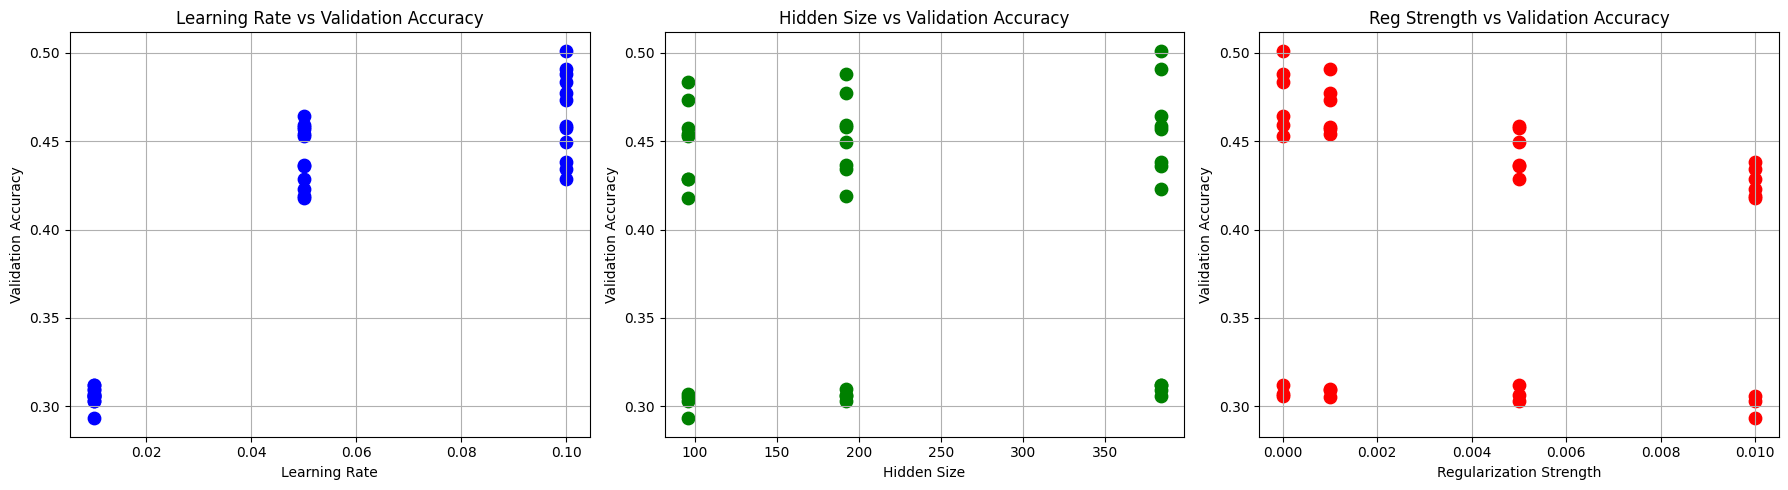

In [3]:
# 将超参数搜索结果转换为 DataFrame
data = []
for (lr, hs, reg), acc in results.items():
    data.append({'learning_rate': lr, 'hidden_size': hs, 'reg': reg, 'val_acc': acc})
df = pd.DataFrame(data)
print("所有超参数组合的结果：")
df_sorted = df.sort_values(by='val_acc', ascending=False)
display(df_sorted)

# 绘制散点图，比较不同超参数组合的效果
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 学习率 vs 验证准确率
axs[0].scatter(df['learning_rate'], df['val_acc'], color='blue', s=80)
axs[0].set_xlabel('Learning Rate')
axs[0].set_ylabel('Validation Accuracy')
axs[0].set_title('Learning Rate vs Validation Accuracy')
axs[0].grid(True)

# 隐藏层大小 vs 验证准确率
axs[1].scatter(df['hidden_size'], df['val_acc'], color='green', s=80)
axs[1].set_xlabel('Hidden Size')
axs[1].set_ylabel('Validation Accuracy')
axs[1].set_title('Hidden Size vs Validation Accuracy')
axs[1].grid(True)

# 正则化强度 vs 验证准确率
axs[2].scatter(df['reg'], df['val_acc'], color='red', s=80)
axs[2].set_xlabel('Regularization Strength')
axs[2].set_ylabel('Validation Accuracy')
axs[2].set_title('Reg Strength vs Validation Accuracy')
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [4]:
# 筛选验证准确率最高的超参数组合
best_params_row = df_sorted.iloc[0]
print("最佳超参数组合：")
print(best_params_row)

# best_net 已经是 hyperparameter_tuning 返回的最佳模型，直接在测试集上评估
test_acc = test(best_net, X_test, y_test)
print("最佳模型在测试集上的准确率：{:.4f}".format(test_acc))


最佳超参数组合：
learning_rate      0.1000
hidden_size      384.0000
reg                0.0000
val_acc            0.5012
Name: 32, dtype: float64
Test accuracy: 0.4945
最佳模型在测试集上的准确率：0.4945


In [5]:
import pickle

def save_model(net, filename="best_model.pkl"):
    """
    保存模型参数到文件。
    参数：
      - net: 模型实例，其参数存储在 net.params 中
      - filename: 保存文件名，默认为 "best_model.pkl"
    """
    with open(filename, "wb") as f:
        pickle.dump(net.params, f)
    print(f"模型参数已保存到 {filename}")

# 保存最佳模型
save_model(best_net, "best_model.pkl")


模型参数已保存到 best_model.pkl
